# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – Simple scenario that sets the initial conditions to be cold (-3°C) with the hydrostatic head at - 1 m (Level of permafrost table or active layer), The top thermal boundary condition is the actual daily air temperature (2017) which is to check how the model performs under dynamic air temperature. To check for the influence of moisture, constant precipitation is considered from 150th - 300th day of the year (repeated all the 5 years). It can also be used as the intial conditions for the actual model** 

- T : 5 years (1825 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017) [The values are repeated for 5 years]**
- Boundary conditions : Top - **Constant precipitation = - 0.5e-07 m/s = - 0.002 mol/(m^2 s^1)** 

- Parameters:
    - VGc - Peat: alpha – 0.0005, n – 1.39, S_res = 0.05
    - VGc - Mineral & Bedrock: alpha – 2e-05, n – 1.58, S_res = 0.2
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – 0.85, 1e-07 Pa^-1; Mineral – 0.5, 1e-08 Pa^-1;
    - Permeability: Peat – 5e-11 m^2, Mineral & Bedrock – 2e-13 m^2 
    - Density: Peat – 700 kg/m^3, Mineral & Bedrock – 2170 kg/m^3

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1B_V.xml
    - Output folder (.demo file): Case1B_V.demo

- Expected results: Based on scenario III & IV, during the rain event, we will be observing an increase in moisture content within the subsurface. This increase will be in parallel with the thawing period. I would first expect the moisture content will rise in in the initial layers and then the increase will be seen at greater depths (probably after a delay). The heat associated with moisture will also increase the temperature within the subsurface. During this time period, probably we will be observing higher temperatures compared to scenario IV (without any precipitation). 

### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  



#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | BCTopconstprep - Constant precipitation at definite time periods |
| Thermal                                                            |  265.15 K (-8 °C)   |  BCTopAirT = daily air temperature (2017) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.0005 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.39
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.05
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.05
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0005
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.39
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.05
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock |	2.00E-05
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock |	1.58
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock |	0.2
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |		0.05
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:

- Xml file: **Case1B_V.xml
- Dataset: Air temperature at 5 m prepared in the notebook - /home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/**AWS_final_metdata_2015_20.ipynb**
- Output folder (.demo file): **Case1B_V.demo**

## Workflow:
1. Importing all the modules
2. Plotting the input data 
3. Plotting with the ats output code.
4. Plotting the visualization results.
5. Preparing the final results as initial conditions for another model (not required) 
6. Plotting the observation results.
7. Comparing the simulation results with the measurements

### 1. Importing all the modules

In [72]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B


In [66]:
# Output directory name & input xml file name:
file_name = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.demo'
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.xml'
### Reading the observation files:
file_observation = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.demo/observation.dat'
file_obs_name = 'Case1_B_V.dat'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

### 2. Plotting the input data

In [67]:
input_data_file_name = 'Data/Yakou_data_constprep_5yrs.h5'

In [68]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    prep_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




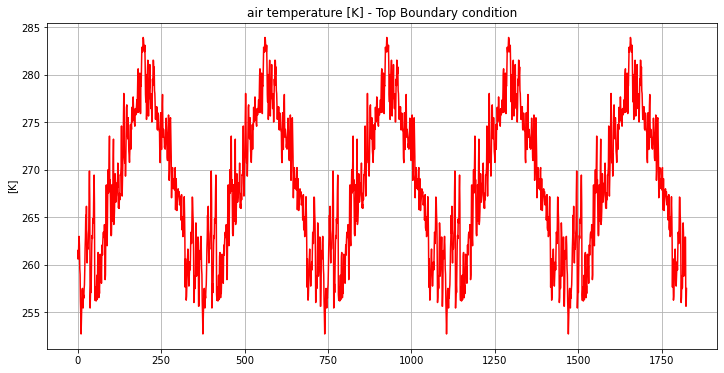

In [69]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

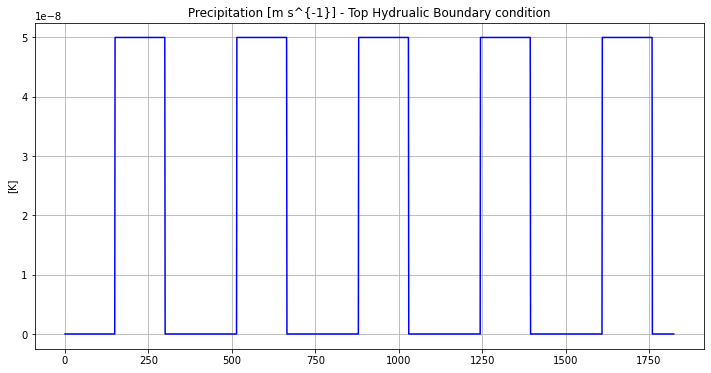

In [70]:
plt.figure(figsize=(12, 6))
plt.title('Precipitation [m s^{-1}] - Top Hydrualic Boundary condition')
plt.plot(prep_2017_5yrs, 'b')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

### 2. Plotting with the ATS output code

KeyError: 'Unable to open object (addr overflow, addr = 22592728, size = 328, eoa = 22572016)'

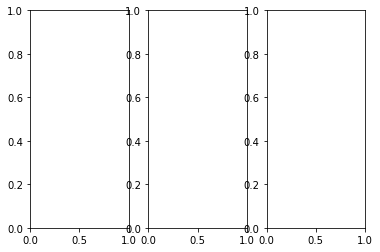

In [71]:
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(file_name, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(file_name, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3)
plot(file_name, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3)
plot(file_name, axs, '-')
decorate(axs)
axs[0].set_ylim([-0.5,0])
axs[1].set_ylim([-0.5,0])
axs[2].set_ylim([-0.5,0])


plt.show()
            

In [11]:
# load the ATS solution
directory = f"{file_name}"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)

### 3. Plotting the visualization results

#### Extracting the names of the dataset:

In [12]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = np.array(hdf.get('base_porosity.cell.0'))
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'capillary_pressure_liq_ice.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'density_rock.cell.0', 'dwater_content|dtemperature.cell.0', 'energy.cell.0', 'enthalpy.cell.0', 'enthalpy_times_relative_permeability.cell.0', 'internal_energy_ice.cell.0', 'internal_energy_liquid.cell.0', 'internal_energy_rock.cell.0', 'mass_density_liquid.cell.0', 'molar_density_ice.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_ice.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'thermal_conductivity.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


['0' '100' '1000' '1100' '1200' '1300' '1400' '1500' '1600' '1700' '1800'
 '1900' '200' '2000' '2100' '2200' '2300' '2400' '2500' '2600' '2700'
 '2800' '2900' '300' 

#### Determining the time instances at which the data is stored

In [13]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        print(time_period)
        print("Length of the time period - ",len(time_period))
        # Time series stored in an irregular format! - 
        # ['0' '100' '103' '104' '105' '106' '107' '108' '109' '110' '111']

[   0  100 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900  200 2000
 2100 2200 2300 2400 2500 2600 2700 2800 2900  300 3000 3100 3200 3300
 3400 3500 3600 3700 3800 3900  400 4000 4100 4200 4300 4400 4500 4600
 4700 4800 4900  500 5000 5100 5200 5300 5400 5500 5600 5700  600  700
  800  900]
Length of the time period -  58


In [14]:
len(time_period)

58

#### Recreating the node information of the cells:
- The centroidal distance was calculated while generating the ats mesh - rk_model/Data/data_mesh/hillslope_example.ipynb
- And stored in the file : /home/rk/ats_rk/testing/ats-demos/rk_model/Data/data_mesh/test_org_column_centroidal_dist.csv

In [15]:
dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/data_mesh/test_org_column_centroidal_dist.csv',header=None)
# Renaming the column:
dz_hillslope.columns = ['centroidal_distance']
dz_hillslope.head()

,centroidal_distance
0,0.006000
1,0.019200
2,0.035040
3,0.054048
4,0.076858


In [16]:
# Storing the negative of the centroidal distance as we are going downwards
z = -dz_hillslope['centroidal_distance']

In [17]:
print(z.head())

0   -0.006000
1   -0.019200
2   -0.035040
3   -0.054048
4   -0.076858
Name: centroidal_distance, dtype: float64


In [18]:
def inputfiles_pddataframes(file_name,t,z):
    """
    The function is defined to read the input files from the ats simulation. 
    For each time instance, a dataframe can store the data.
 
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    t : The time instance at which the data is required.
    Ex: cell_volume.cell.0/{t} - here 0/0 - signifies the first directory (with data at t=0), 
    similarly 0/1 - signifies the second directory (with data at t=1).
            
    Output parameters:
    
    data_results : pandas dataframe with all the key elements of the simulation.
    
    - idea - can't we write a smart function that directly accesses all the columns? - !
    
    """
    
    
    with h5py.File(file_name,'r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
        cell_volume = cell_volume_all.flatten()
        
        
        # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
        # Can we simplify the code?
        
        data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

        mass_density_all = np.array(hdf.get(f'mass_density_liquid.cell.0/{t}'))
        mass_density = mass_density_all.flatten()
        data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density



        molar_density_all = np.array(hdf.get(f'molar_density_liquid.cell.0/{t}'))
        molar_density = molar_density_all.flatten()
        data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density


        permeability_all = np.array(hdf.get(f'permeability.cell.0/{t}'))
        permeability = permeability_all.flatten()
        data_results['Absolute permeability [K] (m^{2})'] = permeability



        porosity_all = np.array(hdf.get(f'porosity.cell.0/{t}'))
        porosity = porosity_all.flatten()
        data_results['Porosity [phi] (-)'] = porosity

        pressure_all = np.array(hdf.get(f'pressure.cell.0/{t}'))
        pressure = pressure_all.flatten()
        data_results['Abs pressure [p_abs] [Pa]'] = pressure 
        # Water pressure or total pressure (Atm + water)? - Probably both

        relative_permeability_all = np.array(hdf.get(f'relative_permeability.cell.0/{t}'))
        relative_permeability = relative_permeability_all.flatten()
        data_results['Relative permeability [kr] [-]'] = relative_permeability


        saturation_gas_all = np.array(hdf.get(f'saturation_gas.cell.0/{t}'))
        saturation_gas = saturation_gas_all.flatten()
        data_results['Saturation of gas [s_g] [-]'] = saturation_gas


        saturation_liquid_all = np.array(hdf.get(f'saturation_liquid.cell.0/{t}'))
        saturation_liquid = saturation_liquid_all.flatten()
        data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid


        
        saturation_ice_all = np.array(hdf.get(f'saturation_ice.cell.0/{t}'))
        saturation_ice = saturation_ice_all.flatten()
        data_results['Saturation of ice [s_i] [-]'] = saturation_ice
        
        temperature_all = np.array(hdf.get(f'temperature.cell.0/{t}'))
        temperature = temperature_all.flatten()
        data_results['Temperature [T] [K]'] = temperature


        viscosity_liquid_all = np.array(hdf.get(f'viscosity_liquid.cell.0/{t}'))
        viscosity_liquid = viscosity_liquid_all.flatten()
        data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid


        water_content_all = np.array(hdf.get(f'water_content.cell.0/{t}'))
        water_content = water_content_all.flatten()
        data_results['water_content [theta] mols'] = water_content
        
        return data_results

##### Storing the data for all time instances

In [19]:
for i in time_period:
    # https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops
    locals()["data_results_"+str(i)] = inputfiles_pddataframes(file_name=f'{file_name}/ats_vis_data.h5', t=i,z=z)

#### Defining a dataframe that extracts the data for a single variable for all time instances

In [20]:
def input_datavar(file_name, variable, z):
    """
    The function defined to extract a variable across all time instances.
    
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    variable: Name of the variable in the dataset that you are interested in.
    Ex: 'cell_volume'
    
    Output parameters:
    
    data_var : pandas dataframe with the time series data of the variable.
    
    """
    
    # To determine the time period and the list in which the dataframes 
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        var_all_0 = np.array(hdf.get(f'{variable}.cell.0/0'))
        var_0 = var_all_0.flatten()
        data_var = pd.DataFrame(index=z,data=var_0,columns=[f'0'])
        
        for i in time_period[1:]:
            var_all = np.array(hdf.get(f'{variable}.cell.0/{i}'))
            var = var_all.flatten()
            
            data_var[f'{i}'] = var
    
    return data_var

In [21]:
### Accessing the variable at all time instances

### Add or remove variable name if required
variables = ['saturation_liquid','saturation_ice','saturation_gas','pressure','relative_permeability','temperature']

for i in variables:
    locals()["df_"+str(i)] = input_datavar(file_name, i, z=z)
    len_rows = len(locals()["df_"+str(i)].columns)
    locals()["df_"+str(i)].columns = np.arange(0,len_rows,1)

In [22]:
df_pressure.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
centroidal_distance,,,,,,,,,,,,,,,,,,,,,
-0.006000,91577.189900,91451.472220,86661.355379,98488.167279,98202.040360,98964.571957,90079.139030,97855.435608,83260.764305,97446.279028,...,95442.572299,98505.005374,97586.930869,95404.408641,86619.471497,86380.020515,96807.998293,97713.085982,97907.062635,90826.259395
-0.019200,91706.637680,91567.501871,98643.807626,97138.158398,96681.886594,99093.991090,90208.483119,97984.180122,77202.620163,97575.354989,...,97193.418307,98632.691311,97457.627467,95533.774292,87051.197393,86891.616931,96935.948540,97841.841057,98036.642546,71468.598242
-0.035040,91861.975016,91708.767555,94531.572819,75594.395921,81453.314561,99249.264089,90363.573169,98137.722936,79968.064909,94321.493074,...,57142.505780,47839.896272,56745.226106,95688.908666,87481.957800,87315.335409,92843.198521,97995.411046,98225.959186,-28029.939056
-0.054048,92048.379819,92103.733849,90121.903348,155639.245829,93292.851819,99421.670594,90488.027870,92436.777507,80359.830197,79905.033635,...,51342.111364,22333.860309,36702.134841,95824.043438,87687.519889,87528.834039,79670.063206,89325.289970,84991.910765,44547.697020
-0.076858,92272.065583,92336.124165,90492.290386,478033.375893,96979.483883,99644.509101,90711.594084,89482.807573,80589.704459,80414.166143,...,65703.582986,91604.687754,72107.755608,96047.390964,87949.166973,88070.385726,79897.266640,87771.041043,83149.461332,64293.339331


In [23]:
pressure_head_data = df_pressure/(10000)

In [24]:
pressure_head_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
centroidal_distance,,,,,,,,,,,,,,,,,,,,,
-0.006000,9.157719,9.145147,8.666136,9.848817,9.820204,9.896457,9.007914,9.785544,8.326076,9.744628,...,9.544257,9.850501,9.758693,9.540441,8.661947,8.638002,9.680800,9.771309,9.790706,9.082626
-0.019200,9.170664,9.156750,9.864381,9.713816,9.668189,9.909399,9.020848,9.798418,7.720262,9.757535,...,9.719342,9.863269,9.745763,9.553377,8.705120,8.689162,9.693595,9.784184,9.803664,7.146860
-0.035040,9.186198,9.170877,9.453157,7.559440,8.145331,9.924926,9.036357,9.813772,7.996806,9.432149,...,5.714251,4.783990,5.674523,9.568891,8.748196,8.731534,9.284320,9.799541,9.822596,-2.802994
-0.054048,9.204838,9.210373,9.012190,15.563925,9.329285,9.942167,9.048803,9.243678,8.035983,7.990503,...,5.134211,2.233386,3.670213,9.582404,8.768752,8.752883,7.967006,8.932529,8.499191,4.454770
-0.076858,9.227207,9.233612,9.049229,47.803338,9.697948,9.964451,9.071159,8.948281,8.058970,8.041417,...,6.570358,9.160469,7.210776,9.604739,8.794917,8.807039,7.989727,8.777104,8.314946,6.429334


In [25]:
pressure_head_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [26]:
### Time instances to plot
TimePeriod_plot = [0, 5, 10, 20, 25, 30]

Text(0.5, 0, 'Saturation (-)')

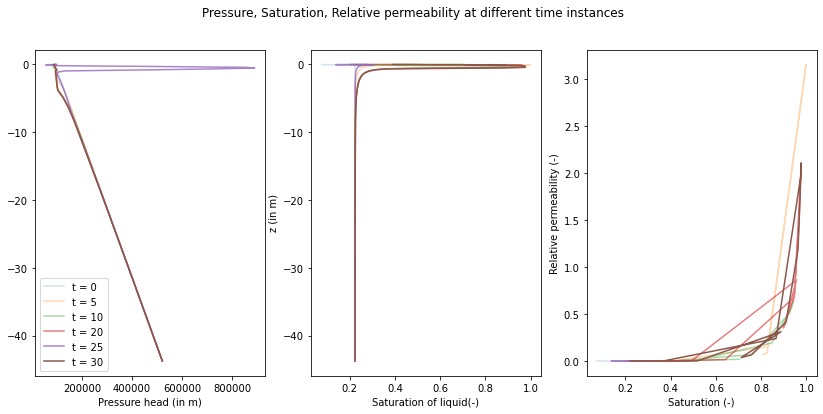

In [27]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Relative permeability at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(df_pressure[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]}')
ax2.plot(df_pressure[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}')
ax2.plot(df_pressure[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}')
ax2.plot(df_pressure[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}')
ax2.plot(df_pressure[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}')
ax2.plot(df_pressure[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()

ax3.plot(df_saturation_liquid[TimePeriod_plot[0]], df_relative_permeability[TimePeriod_plot[0]], alpha=0.2)
ax3.plot(df_saturation_liquid[TimePeriod_plot[1]], df_relative_permeability[TimePeriod_plot[1]], alpha=0.3)
ax3.plot(df_saturation_liquid[TimePeriod_plot[2]], df_relative_permeability[TimePeriod_plot[2]], alpha=0.4)
ax3.plot(df_saturation_liquid[TimePeriod_plot[3]], df_relative_permeability[TimePeriod_plot[3]], alpha=0.6)
ax3.plot(df_saturation_liquid[TimePeriod_plot[4]], df_relative_permeability[TimePeriod_plot[4]], alpha=0.8)
ax3.plot(df_saturation_liquid[TimePeriod_plot[5]], df_relative_permeability[TimePeriod_plot[5]], alpha=1)
#ax3.plot(df_saturation_liquid[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax3.set_ylabel('Relative permeability (-)')
ax3.set_xlabel('Saturation (-)')


Text(0.5, 0, 'Temperature (K)')

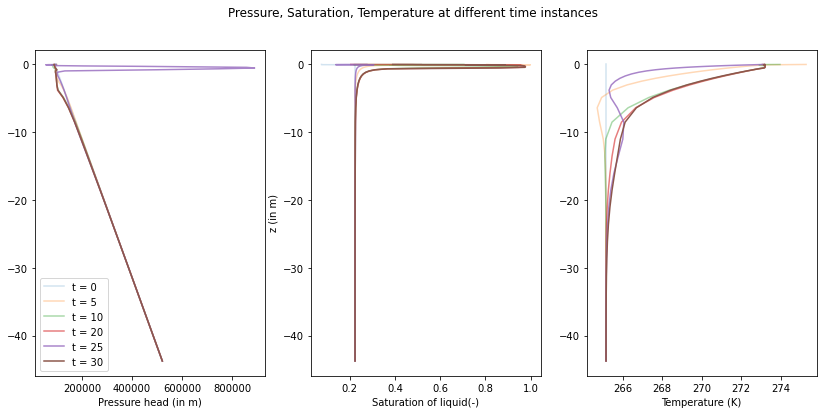

In [28]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(df_pressure[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]}')
ax2.plot(df_pressure[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}')
ax2.plot(df_pressure[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}')
ax2.plot(df_pressure[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}')
ax2.plot(df_pressure[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}')
ax2.plot(df_pressure[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()

ax3.plot(df_temperature[TimePeriod_plot[0]], z, alpha=0.2)
ax3.plot(df_temperature[TimePeriod_plot[1]], z, alpha=0.3)
ax3.plot(df_temperature[TimePeriod_plot[2]], z, alpha=0.4)
ax3.plot(df_temperature[TimePeriod_plot[3]], z, alpha=0.6)
ax3.plot(df_temperature[TimePeriod_plot[4]], z, alpha=0.8)
ax3.plot(df_temperature[TimePeriod_plot[5]], z, alpha=1)
#ax3.plot(df_temperature[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax3.set_xlabel('Temperature (K)')
#ax3.set_xlabel('Saturation (-)')

Text(0.5, 0, 'Temperature (K)')

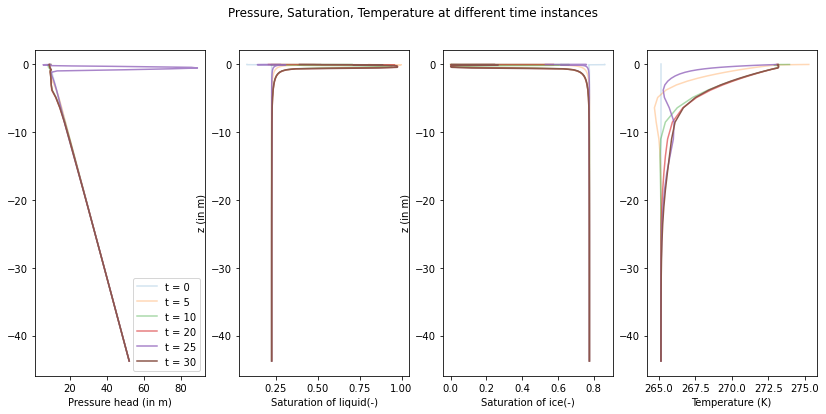

In [29]:
fig, (ax2, ax1, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')


ax3.plot(df_saturation_ice[TimePeriod_plot[0]], z, alpha=0.2)
ax3.plot(df_saturation_ice[TimePeriod_plot[1]], z, alpha=0.3)
ax3.plot(df_saturation_ice[TimePeriod_plot[2]], z, alpha=0.5)
ax3.plot(df_saturation_ice[TimePeriod_plot[3]], z, alpha=0.6)
ax3.plot(df_saturation_ice[TimePeriod_plot[4]], z, alpha=0.8)
ax3.plot(df_saturation_ice[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_ice[200], z, alpha=1)
#ax1.legend()
ax3.set_ylabel('z (in m)')
ax3.set_xlabel('Saturation of ice(-)')

ax2.plot(pressure_head_data[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]}')
ax2.plot(pressure_head_data[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}')
ax2.plot(pressure_head_data[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}')
ax2.plot(pressure_head_data[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}')
ax2.plot(pressure_head_data[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}')
ax2.plot(pressure_head_data[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()



ax4.plot(df_temperature[TimePeriod_plot[0]], z, alpha=0.2)
ax4.plot(df_temperature[TimePeriod_plot[1]], z, alpha=0.3)
ax4.plot(df_temperature[TimePeriod_plot[2]], z, alpha=0.4)
ax4.plot(df_temperature[TimePeriod_plot[3]], z, alpha=0.6)
ax4.plot(df_temperature[TimePeriod_plot[4]], z, alpha=0.8)
ax4.plot(df_temperature[TimePeriod_plot[5]], z, alpha=1)
#ax3.plot(df_temperature[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax4.set_xlabel('Temperature (K)')
#ax3.set_xlabel('Saturation (-)')

### Plotting the changes near the surface

(-0.3, 0.0)

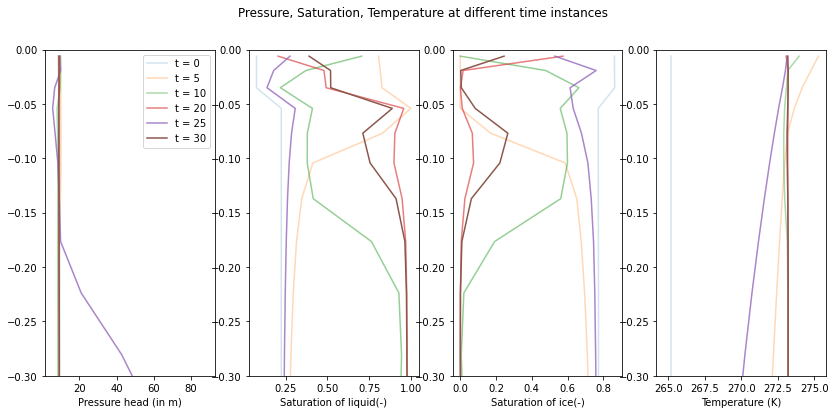

In [30]:
fig, (ax2, ax1, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Temperature at different time instances')

z = df_saturation_liquid.index

ax1.plot(df_saturation_liquid[TimePeriod_plot[0]], z, alpha=0.2)
ax1.plot(df_saturation_liquid[TimePeriod_plot[1]], z, alpha=0.3)
ax1.plot(df_saturation_liquid[TimePeriod_plot[2]], z, alpha=0.5)
ax1.plot(df_saturation_liquid[TimePeriod_plot[3]], z, alpha=0.6)
ax1.plot(df_saturation_liquid[TimePeriod_plot[4]], z, alpha=0.8)
ax1.plot(df_saturation_liquid[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
#ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')
ax1.set_ylim(-0.3, 0.0)

ax3.plot(df_saturation_ice[TimePeriod_plot[0]], z, alpha=0.2)
ax3.plot(df_saturation_ice[TimePeriod_plot[1]], z, alpha=0.3)
ax3.plot(df_saturation_ice[TimePeriod_plot[2]], z, alpha=0.5)
ax3.plot(df_saturation_ice[TimePeriod_plot[3]], z, alpha=0.6)
ax3.plot(df_saturation_ice[TimePeriod_plot[4]], z, alpha=0.8)
ax3.plot(df_saturation_ice[TimePeriod_plot[5]], z, alpha=1)
#ax1.plot(df_saturation_ice[200], z, alpha=1)
#ax1.legend()
#ax3.set_ylabel('z (in m)')
ax3.set_xlabel('Saturation of ice(-)')
ax3.set_ylim(-0.3, 0.0)

ax2.plot(pressure_head_data[TimePeriod_plot[0]], z, alpha=0.2, label =f't = {TimePeriod_plot[0]}')
ax2.plot(pressure_head_data[TimePeriod_plot[1]], z, alpha=0.3, label =f't = {TimePeriod_plot[1]}')
ax2.plot(pressure_head_data[TimePeriod_plot[2]], z, alpha=0.4, label =f't = {TimePeriod_plot[2]}')
ax2.plot(pressure_head_data[TimePeriod_plot[3]], z, alpha=0.6, label =f't = {TimePeriod_plot[3]}')
ax2.plot(pressure_head_data[TimePeriod_plot[4]], z, alpha=0.8, label =f't = {TimePeriod_plot[4]}')
ax2.plot(pressure_head_data[TimePeriod_plot[5]], z, alpha=1, label =f't = {TimePeriod_plot[5]}')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()
ax2.set_ylim(-0.3, 0.0)



ax4.plot(df_temperature[TimePeriod_plot[0]], z, alpha=0.2)
ax4.plot(df_temperature[TimePeriod_plot[1]], z, alpha=0.3)
ax4.plot(df_temperature[TimePeriod_plot[2]], z, alpha=0.4)
ax4.plot(df_temperature[TimePeriod_plot[3]], z, alpha=0.6)
ax4.plot(df_temperature[TimePeriod_plot[4]], z, alpha=0.8)
ax4.plot(df_temperature[TimePeriod_plot[5]], z, alpha=1)
#ax3.plot(df_temperature[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax4.set_xlabel('Temperature (K)')
ax4.set_ylim(-0.3, 0.0)
#ax3.set_xlabel('Saturation (-)')

### 4. Preparing the final results as initial conditions for another model 

##### Column data as an example (for comparison later) - Pressure, temperature and 'z' value is needed

In [ ]:
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'column_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure_column = np.array(hdf.get('pressure'))
    print(pressure_column)
    print(np.array(hdf.get('temperature')))
    print(np.array(hdf.get('z')))

##### Final results taken as initial conditions 

In [ ]:
directory

In [ ]:
time_period.max()

In [ ]:
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{directory}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    
    # 
    pressure_column = np.array(hdf.get(f'pressure.cell.0/{time_period.max()}'))
    temperature_column = np.array(hdf.get(f'temperature.cell.0/{time_period.max()}'))


In [ ]:
#hf_input = h5py.File('IC_column_data_final.h5','w')

In [ ]:
#hf_input.create_dataset('z',data=z)
#hf_input.create_dataset('pressure',data=pressure_column)
#hf_input.create_dataset('temperature',data=temperature_column)

In [ ]:
#hf_input.close()

In [ ]:
### Reading the file once more to check if the data are stored accurately
# Storing the input data as a dataframe
#with h5py.File(f'IC_column_data_final.h5','r') as hdf:
    #ls = list(hdf.keys())
    #pressure_column_data = np.array(hdf.get(f'pressure'))
    #temperature_column_data = np.array(hdf.get(f'temperature'))

    
    #input_data_hillslope = pd.DataFrame(index=np.arange(1,41,1),data=z,columns=['centroidal_distance'])
    #input_data_hillslope['pressure'] = pressure_column_data
    #input_data_hillslope['temperature'] = temperature_column_data
    #input_data_hillslope.rename(columns={'centroidal_distance':'z'}, inplace=True)



In [ ]:
#plt.plot(input_data_hillslope['pressure'], input_data_hillslope['z'])

In [ ]:
#plt.plot(input_data_hillslope['temperature'], input_data_hillslope['z'])

#### 5. Plotting the observation results.

In [31]:
file_observation

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.demo/observation.dat'

In [32]:
file_obs_name

'Case1_B_V.dat'

In [33]:
# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat
with open(f'{file_observation}') as oldfile, open(f'{file_obs_name}', 'w') as newfile:
    for line in oldfile:
        if not any(remove_hash in line for remove_hash in remove_hashs):
            newfile.write(line)

In [34]:
# Reading the csv file 
df_observation = pd.read_csv(f'{file_obs_name}',sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.174585e+06,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,...,0.863441,0.772115,0.772931,0.774190,0.775791,0.776224,0.776224,0.776225,0.776225,0.0
1.0,86400.0,1.174585e+06,260.668072,260.980509,261.725722,262.822572,264.063654,264.902121,265.101848,265.145622,...,0.867149,0.776762,0.776359,0.775964,0.776229,0.776307,0.776232,0.776225,0.776225,1.0
2.0,172800.0,1.174585e+06,260.813451,260.998833,261.466536,262.244153,263.354811,264.478433,264.936207,265.112414,...,0.867137,0.777024,0.777026,0.776949,0.776930,0.776584,0.776289,0.776225,0.776225,2.0
3.0,259200.0,1.174585e+06,262.331194,262.344960,262.427383,262.687484,263.285120,264.208206,264.759645,265.056602,...,0.866183,0.776005,0.776520,0.777040,0.777350,0.776871,0.776384,0.776225,0.776225,3.0
4.0,345600.0,1.174585e+06,262.996234,262.992006,263.005606,263.102749,263.420242,264.088069,264.618435,264.989571,...,0.865655,0.775320,0.776015,0.776863,0.777530,0.777093,0.776496,0.776225,0.776225,4.0


#### Plotting the values 
##### 1. Subsurface temperature

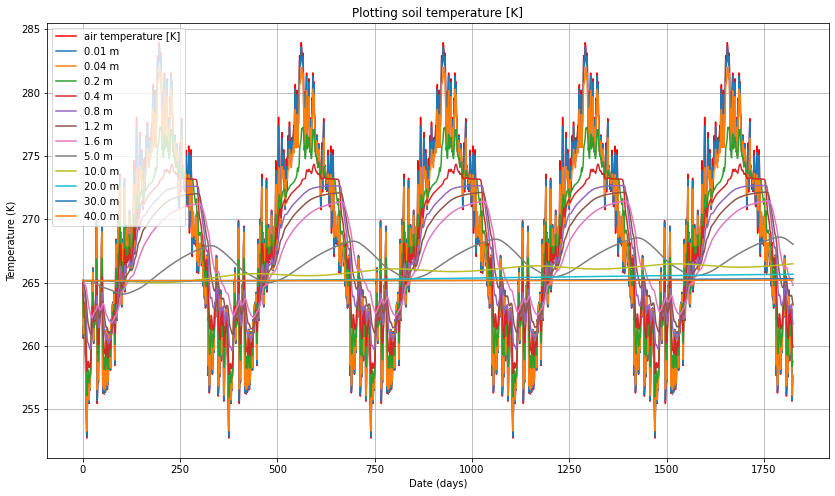

In [35]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
plt.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
plt.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
plt.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
plt.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
plt.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### 2. Saturation of liquid

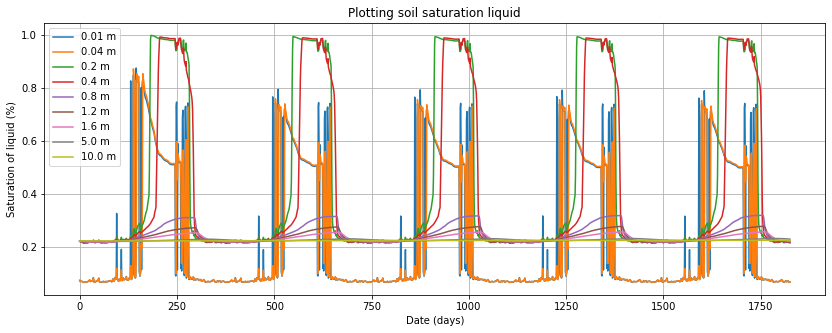

In [36]:
plt.figure(figsize=(14,5))
plt.title('Plotting soil saturation liquid')
plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
plt.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
plt.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

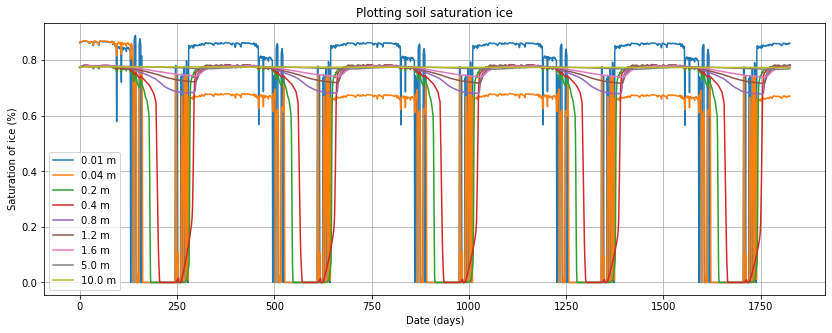

In [37]:
plt.figure(figsize=(14,5))
plt.title('Plotting soil saturation ice')
plt.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
plt.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
plt.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

plt.ylabel('Saturation of ice (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

### Plotting temperature, saturation of liquid, and saturation of ice

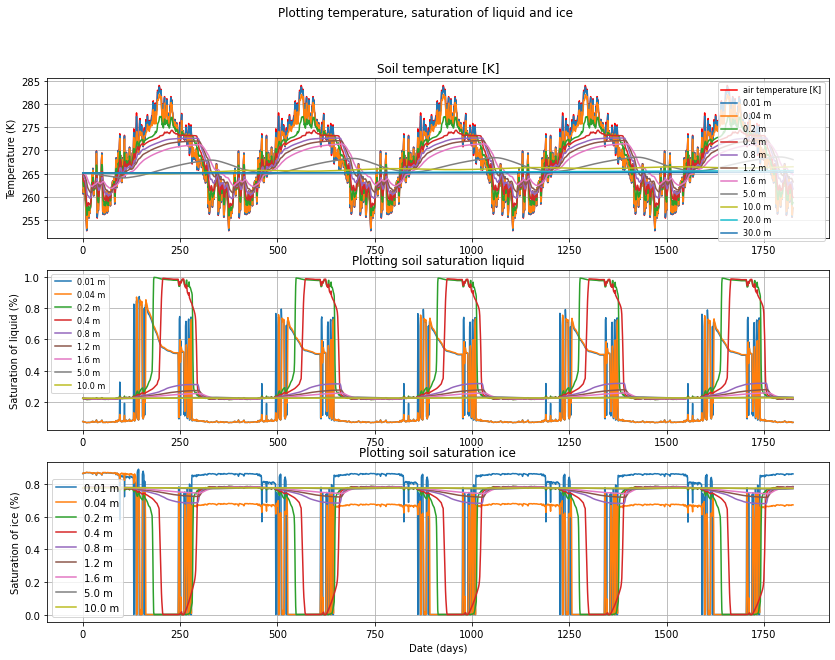

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

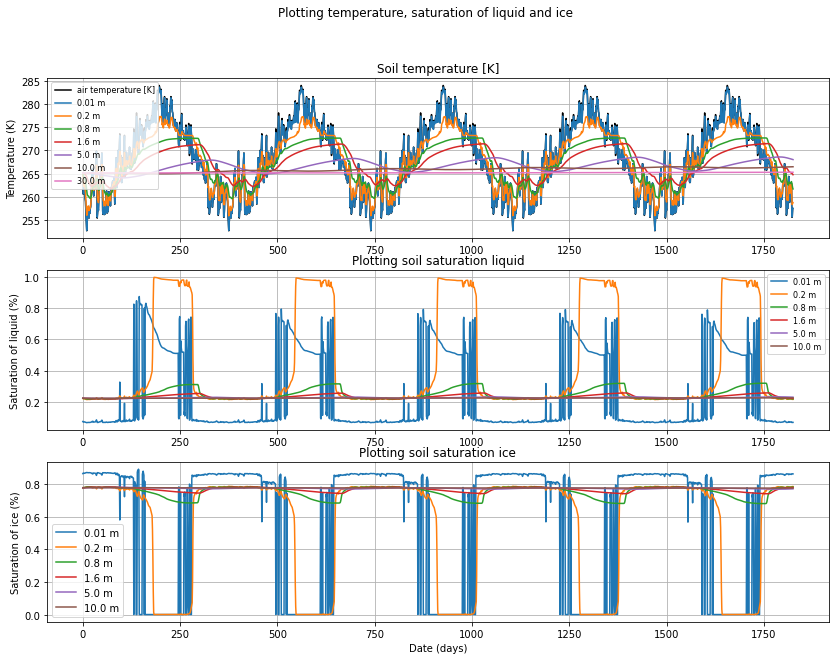

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
#ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
#ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

### Comments:
- Make note later!

### 7. Comparing the simulation results with the measurements
- The measurement data is evaluated in the file 'AWS_final_metdata_2015_20.ipynb' - To get a better overview, view this Jupyter Notebook

In [40]:
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [41]:
filename_measurements

'../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [42]:
df_AWS = pd.read_excel(f'{filename_measurements}',index_col=0,parse_dates=True) 

In [43]:
df_AWS_details = pd.read_excel('../Data/Data_Yakou/Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [44]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [45]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [46]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [47]:
data_AWS_prep = data_AWS_syn.copy()

In [48]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [49]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [50]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

#### Precipitation - Daily summation of the values are determined instead of mean

In [51]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

#### Plotting Subsurface temperature, moisture, air temperature, and precipitation

Text(0, 0.5, '(mm)')

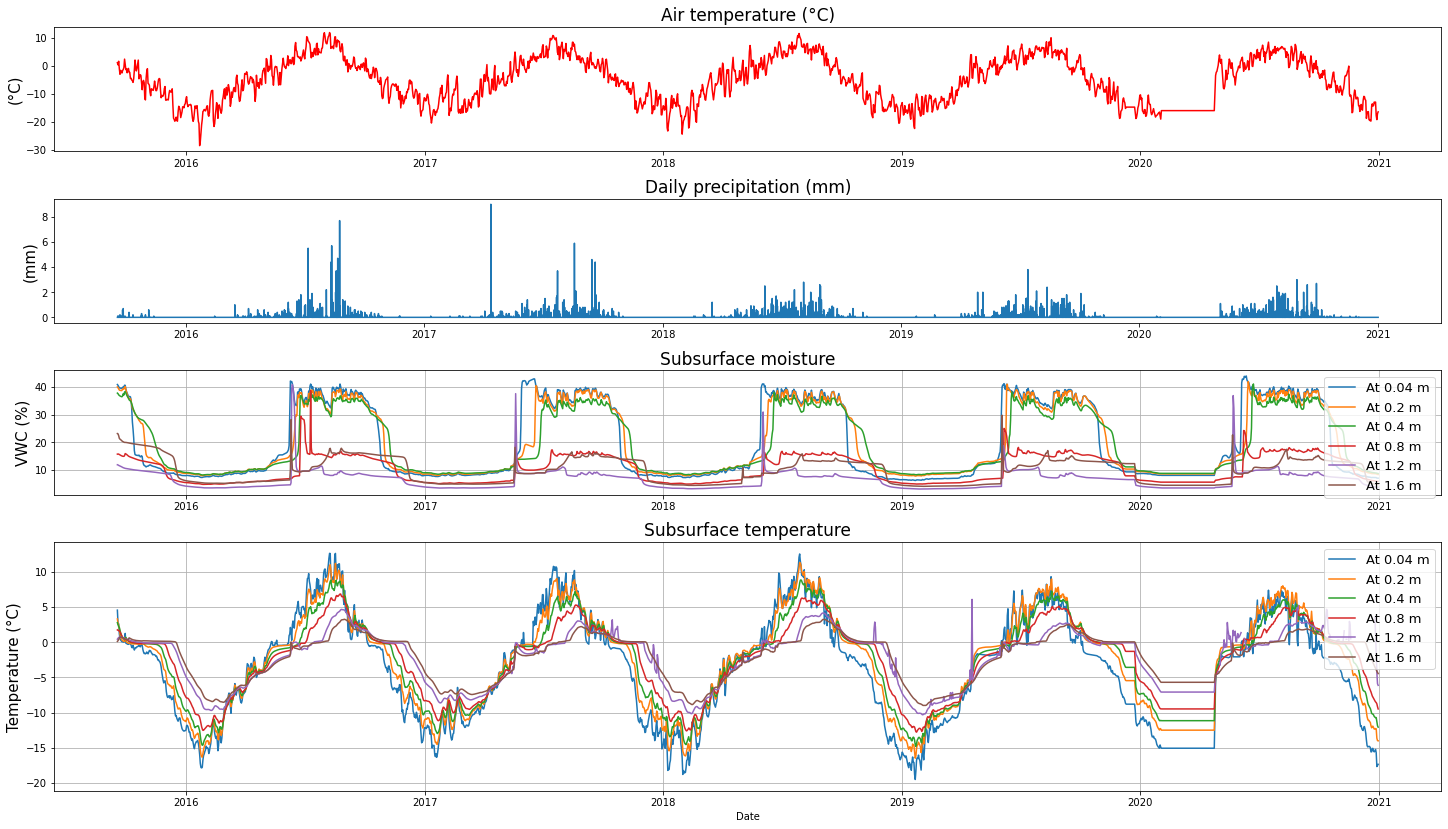

In [52]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,2,2], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[2, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])
f2_ax3 = fig2.add_subplot(spec2[0, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 0])

#plt.title('Soil moisture data - Mean hourly values (linearly interpolated for missing values)')

f2_ax1.set_title('Subsurface moisture',fontsize=17)
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='At 0.04 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='At 0.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='At 0.4 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='At 0.8 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='At 1.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='At 1.6 m')
f2_ax1.set_ylabel('VWC (%)',fontsize=15)
#f2_ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#f2_ax1.xlabel('Date')
f2_ax1.legend(loc=1,fontsize=13)
f2_ax1.grid(True)

f2_ax2.set_title('Subsurface temperature',fontsize=17)
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='At 0.04 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='At 0.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='At 0.4 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='At 0.8 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='At 1.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='At 1.6 m')
f2_ax2.set_ylabel('Temperature (°C)',fontsize=15)
#f2_ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
f2_ax2.set_xlabel('Date')
f2_ax2.legend(loc=1,fontsize=13)
f2_ax2.grid(True)

f2_ax3.set_title('Air temperature (°C)',fontsize=17)
f2_ax3.plot(data_AWS_syn['Air temperature at 5 m (°C)'],'r')
f2_ax3.set_ylabel('(°C)',fontsize=15)



f2_ax4.set_title('Daily precipitation (mm)',fontsize=17)
f2_ax4.plot(data_AWS_prep['Precipitation at 10 m (mm)'])
f2_ax4.set_ylabel('(mm)',fontsize=15)


#plt.savefig('met_data.png',dpi=300,bbox_inches='tight')

### Reducing the data to the year 2017

In [53]:
data_AWS_syn_2017 = data_AWS_syn.loc['2017']

# Changing the units of temperature to Kelvin

data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.04 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.4 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.8 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.6 m (°C)'] + 273.15

#### Plotting the simulated and measured data
1. Subsurface temperature data and moisture data

In [54]:
data_AWS_syn_2017.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=365, freq='D')

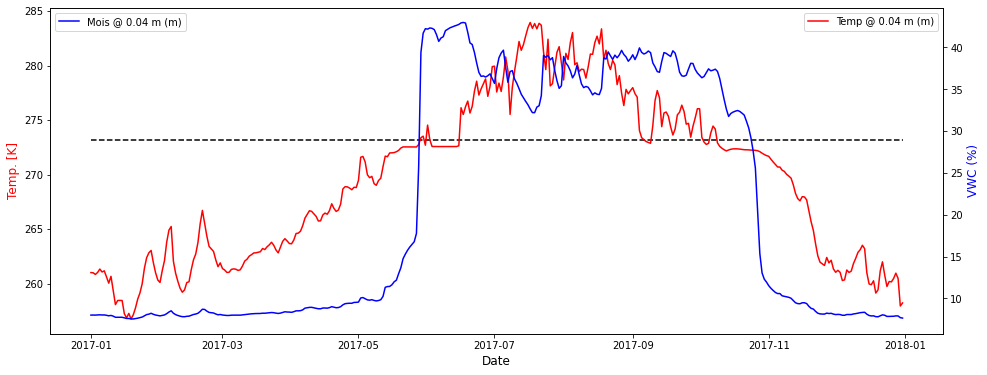

In [55]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, ax = plt.subplots()
fig.set_size_inches(16,6)

# Defining the x-axis
time = data_AWS_syn_2017.index

# Make a plot
ax.plot(time, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'], 'r',label='Temp @ 0.04 m (m)')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temp. [K]', fontsize=12,color='r')
ax.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
ax.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')

ax2 = ax.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.04 m (%)'], 'b',label='Mois @ 0.04 m (m)')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=12, color='b')
ax2.legend(loc=2)


In [56]:
# Converting the index of observation dataframe:

df_simulated = df_observation.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index

df_simulated_2017.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,1.174585e+06,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,...,0.863441,0.772115,0.772931,0.774190,0.775791,0.776224,0.776224,0.776225,0.776225,0.0
2017-01-02,86400.0,1.174585e+06,260.668072,260.980509,261.725722,262.822572,264.063654,264.902121,265.101848,265.145622,...,0.867149,0.776762,0.776359,0.775964,0.776229,0.776307,0.776232,0.776225,0.776225,1.0
2017-01-03,172800.0,1.174585e+06,260.813451,260.998833,261.466536,262.244153,263.354811,264.478433,264.936207,265.112414,...,0.867137,0.777024,0.777026,0.776949,0.776930,0.776584,0.776289,0.776225,0.776225,2.0
2017-01-04,259200.0,1.174585e+06,262.331194,262.344960,262.427383,262.687484,263.285120,264.208206,264.759645,265.056602,...,0.866183,0.776005,0.776520,0.777040,0.777350,0.776871,0.776384,0.776225,0.776225,3.0
2017-01-05,345600.0,1.174585e+06,262.996234,262.992006,263.005606,263.102749,263.420242,264.088069,264.618435,264.989571,...,0.865655,0.775320,0.776015,0.776863,0.777530,0.777093,0.776496,0.776225,0.776225,4.0


In [57]:
df_simulated_2017.columns

Index(['time [s]', 'water content [mol]', 'point -0.01 temperature [K]',
       'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -30.0 temperature [K]', 'point -40.0 temperature [K]',
       'point -0.01 saturation liquid', 'point -0.04 saturation liquid',
       'point -0.1 saturation liquid', 'point -0.2 saturation liquid',
       'point -0.4 saturation liquid', 'point -0.8 saturation liquid',
       'point -1.2 saturation liquid', 'point -1.6 saturation liquid',
       'point -5.0 saturation liquid', 'point -10.0 saturation liquid',
       'point -0.01 saturation ice', 'point -0.04 saturation ice',
       'point -0.1 saturation ice', 'point -0.2 saturation ice',
       'point -0.4 saturation 

In [58]:
df_simulated_2017.loc[:,'point -0.04 saturation liquid']

TIMESTAMP
2017-01-01    0.075456
2017-01-02    0.071625
2017-01-03    0.071638
2017-01-04    0.072647
2017-01-05    0.073197
                ...   
2017-12-27    0.073041
2017-12-28    0.073094
2017-12-29    0.069122
2017-12-30    0.068971
2017-12-31    0.069688
Freq: D, Name: point -0.04 saturation liquid, Length: 365, dtype: float64

In [59]:
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.85 # Peat layer until 0.385
porosity_mineral = 0.5 # Mineral layer until 

df_simulated_2017['Soil moisture at - 0.04 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.04 saturation liquid']*porosity_peat*100
df_simulated_2017['Soil moisture at - 0.2 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.2 saturation liquid']*porosity_peat*100
df_simulated_2017['Soil moisture at - 0.4 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.4 saturation liquid']*porosity_mineral*100
df_simulated_2017['Soil moisture at - 0.8 m (VWC %)'] = df_simulated_2017.loc[:,'point -0.8 saturation liquid']*porosity_mineral*100
df_simulated_2017['Soil moisture at - 1.2 m (VWC %)'] = df_simulated_2017.loc[:,'point -1.2 saturation liquid']*porosity_mineral*100
df_simulated_2017['Soil moisture at - 1.6 m (VWC %)'] = df_simulated_2017.loc[:,'point -1.6 saturation liquid']*porosity_mineral*100

<AxesSubplot:xlabel='TIMESTAMP'>

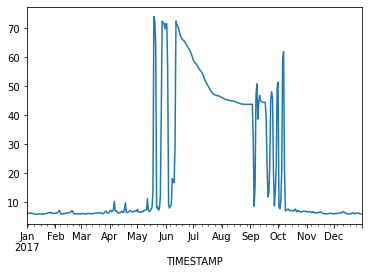

In [60]:
df_simulated_2017.loc[:,'Soil moisture at - 0.04 m (VWC %)'].plot()

<AxesSubplot:xlabel='TIMESTAMP'>

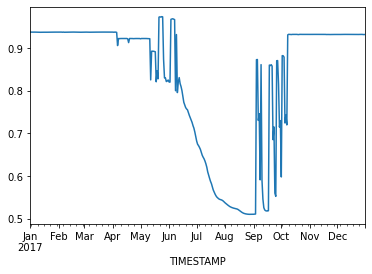

In [61]:
total_saturation = df_simulated_2017['point -0.01 saturation liquid'] + df_simulated_2017['point -0.01 saturation ice']
total_saturation.plot()

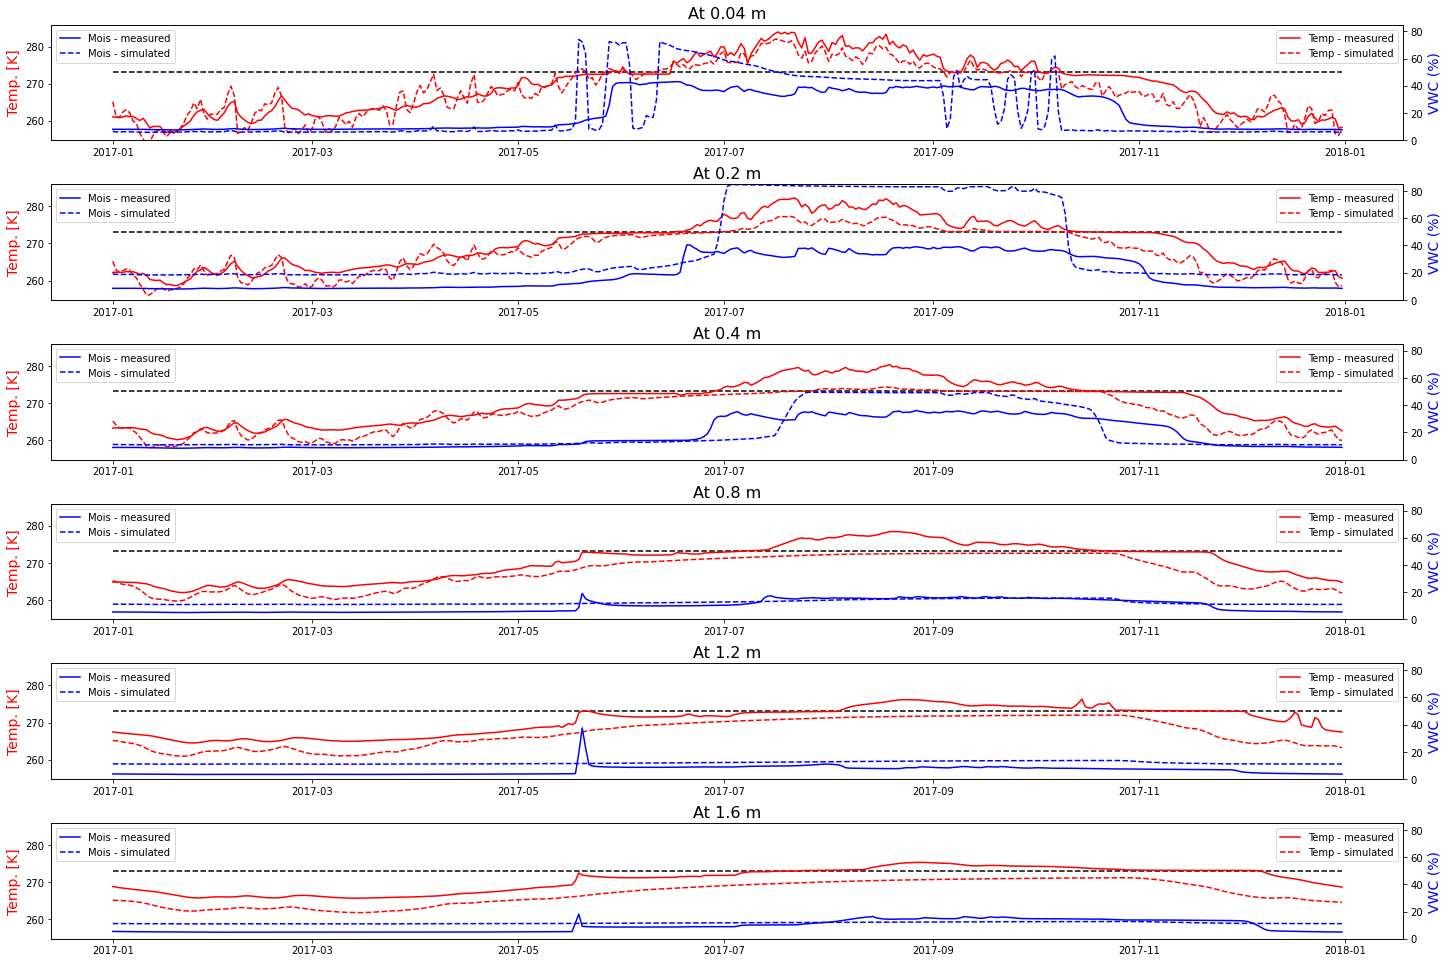

In [64]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[1, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[3, 0])
f2_ax4 = fig2.add_subplot(spec2[4, 0])
f2_ax5 = fig2.add_subplot(spec2[5, 0])
f2_ax6 = fig2.add_subplot(spec2[6, 0])

# Defining the x-axis
time = data_AWS_syn_2017.index

# Make a plot

# Plot f2_ax1 - @ 0.04 m
f2_ax1.plot(time, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'], 'r',label='Temp - measured')
f2_ax1.plot(time, df_simulated_2017['point -0.04 temperature [K]'],'r--',label='Temp - simulated')
f2_ax1.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax1.set_xlabel('Date', fontsize=15)
f2_ax1.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax1.set_title('At 0.04 m', fontsize=16)
f2_ax1.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax1.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax1.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.04 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.04 m (VWC %)'], 'b--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

# Plot f2_ax2 - @ 0.2 m
f2_ax2.plot(time, data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'], 'r',label='Temp - measured')
f2_ax2.plot(time, df_simulated_2017['point -0.2 temperature [K]'],'r--',label='Temp - simulated')
f2_ax2.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax2.set_xlabel('Date', fontsize=15)
f2_ax2.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax2.set_title('At 0.2 m', fontsize=16)
f2_ax2.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax2.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax2.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.2 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.2 m (VWC %)'], 'b--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

# Plot f2_ax3 - @ 0.4 m
f2_ax3.plot(time, data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'], 'r',label='Temp - measured')
f2_ax3.plot(time, df_simulated_2017['point -0.4 temperature [K]'],'r--',label='Temp - simulated')
f2_ax3.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax3.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax3.set_title('At 0.4 m', fontsize=16)
f2_ax3.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax3.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax3.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.4 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.4 m (VWC %)'], 'b--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)



# Plot f2_ax4 - @ 0.8 m
f2_ax4.plot(time, data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'], 'r',label='Temp - measured')
f2_ax4.plot(time, df_simulated_2017['point -0.8 temperature [K]'],'r--',label='Temp - simulated')
f2_ax4.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax4.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax4.set_title('At 0.8 m', fontsize=16)
f2_ax4.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax4.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax4.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 0.8 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 0.8 m (VWC %)'], 'b--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

# Plot f2_ax4 - @ 1.2 m
f2_ax5.plot(time, data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'], 'r',label='Temp - measured')
f2_ax5.plot(time, df_simulated_2017['point -1.2 temperature [K]'],'r--',label='Temp - simulated')
f2_ax5.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax5.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax5.set_title('At 1.2 m', fontsize=16)
f2_ax5.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax5.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax5.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 1.2 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 1.2 m (VWC %)'], 'b--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)



# Plot f2_ax6 - @ 1.6 m
f2_ax6.plot(time, data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'], 'r',label='Temp - measured')
f2_ax6.plot(time, df_simulated_2017['point -1.6 temperature [K]'],'r--',label='Temp - simulated')
f2_ax6.hlines(y=273.15, xmin=datetime(2017, 1, 1), xmax=datetime(2017, 12, 31), color='k', linestyle='--')
#f2_ax3.set_xlabel('Date', fontsize=15)
f2_ax6.set_ylabel('Temp. [K]', fontsize=14,color='r')
f2_ax6.set_title('At 1.6 m', fontsize=16)
f2_ax6.set_ylim(data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].min()-2, data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].max() + 2 )
f2_ax6.legend()
# https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib


ax2 = f2_ax6.twinx()
ax2.plot(time, data_AWS_syn_2017['Soil moisture at - 1.6 m (%)'], 'b',label='Mois - measured')
ax2.plot(time, df_simulated_2017['Soil moisture at - 1.6 m (VWC %)'], 'b--',label='Mois - simulated')

#ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('VWC (%)', fontsize=14, color='b')
ax2.set_ylim(0, 85)
ax2.legend(loc=2)

In [188]:
data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'].

TIMESTAMP
2017-01-01    261.023264
2017-01-02    261.006667
2017-01-03    260.854861
2017-01-04    261.032708
2017-01-05    261.347014
                 ...    
2017-12-27    260.488056
2017-12-28    260.970000
2017-12-29    260.491875
2017-12-30    257.959722
2017-12-31    258.239931
Freq: D, Name: Soil temperature at - 0.04 m (K), Length: 365, dtype: float64

Comments:
* Temperature predictions: The subsurface temperature predictions are quite good. However, with depth the simulated accuracy reduces. The temperature predictions are mostly underpredicted. 
* The initial assumed temperature (270.15K = -3°C) seems to be high and a lower value can be assumed (Maybe = 265.15 K = -8.0°C]. The results from the dynamic simulation can be used as the initial conditions for the actual model.
* The simulated moisture does not show good agreement with the measurements. The variations in moisture are not captured well (Especially during the thaw period). The peat (until 0.385 m) & mineral material  seems to be less porous (assume less porosity and change conductivity values?). At 0.04 m - the moisture remains more or less constant with fluctuations mainly during the thawing period. Due to assumed hydraulic properties, moisture seems to be over-predicted (during thawing period) at depths of 0.04, 0.2, 0.4. As the depth increases (from 0.8 m on - .. ), the simulated moisture remains constant although the measured results show variations during the thawing period (Consider a higher hydraulic influence - Change VGc, reduce porosity for mineral?).
* The following suggestions can be considered for the next set of simulations:
    - The mesh structure can be re-considered - Similar to Yakou column [With 0 - 30 cm & 30 cm - 10 m (Not sure of the lower depth?)]
    - The porosity of peat and mineral layer can be reduced!
    - We can increase the thermal conductivity of both the layers since temperature is being consistently under-predicted!
    